# Lecture 1 Tutorial: Workflow

This notebook will serve as a tutorial on how to use `Julia` with Jupyter Notebooks.

## Loading Packages and Importing Code

I will begin by loading a few packages:

1. `LinearAlegbra.jl`: useful for linear algebra
2. `Random.jl` sets a random seed, for reproducability
3. `PyPlot.jl`: a backend for Matplotlib
4. `Revise.jl`: allows imported code to be edited

In [1]:
using LinearAlgebra
using Random
using PyPlot
using Revise

Next, I am going to import the functions from the `my-ols-fun.jl` file.

In [2]:
includet("my-ols-fun.jl")

## A Quick Example

To see that it worked, let's try a quick example.

The first step is to code our problem instance.
We are going to create data according to the linear model
$$
Y = X \beta + \epsilon
$$

In [3]:
# set seed -- for reproducability
Random.seed!(123)

# problem parameters
n = 50
d = 4
sigma = 1

# create problem instance
beta = ones(d)
X = randn(n,d)
Y = X * beta + randn(n) * sigma;

Note that the semi-colon at the end prevented anything from getting printed.
This is just an aesthetic choice -- you can print the responses `Y` if you want to!

Now let's try running the function `my-ols` that is in `my-ols-fun.jl`.

In [4]:
beta_ols = my_ols(Y, X)

4-element Vector{Float64}:
 1.1175452217801527
 1.181573315310779
 0.6550839348279435
 0.87029330533075

Note that the last returned value is what is being displayed.
This gives a general rule of thumb for how to create code blocks within the notebook: 

> **Golden Rule**: End your block with the data you *want the reader to see*

This golden rule also helps highlight different aspects of markdown ~~pretty text~~ formatting.

## Pitfalls

There are a few common pitfalls to avoid:

- try to keep functions in a separate `Julia` file; otherwise, they can get re-defined
- keep careful track of global variables and the order you run

In [5]:
# let's re-define X
X = randn(n,d)

beta_ols = my_ols(Y,X)

4-element Vector{Float64}:
  0.26382481909460903
  0.43875755945665773
  0.40275859301175987
 -0.31526888975794476

Now the OLS estimate doesn't look anything like the true $\beta$.
But that's because we changed the `X` variable!
This is to show you what can happen is you accidentally change a variable (it's easier than it seems).

A best practice is to always (1) restart the kernel (2) run all from beginning.
If you do this before you show people, then it will be a clean and reproducable notebook free of scope errors.

## Plotting

Let's see how to use some basic plotting software.
I don't want to go into too much details, I just want you to see how it looks in a notebook.

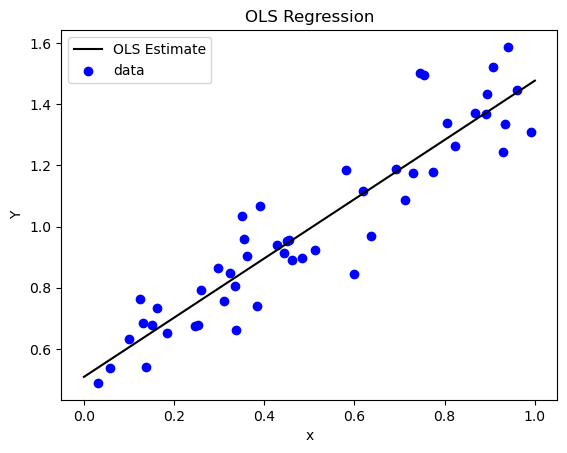

PyObject Text(0.5, 1.0, 'OLS Regression')

In [6]:
Random.seed!(123)

n = 50
sigma = 0.1

beta = [1,0.5]

# create 1d covariate with intercept
x = rand(n)
X = hcat(x, ones(n))

# generate response
Y = X * beta + sigma * randn(n)

# calculate OLS
beta_ols = my_ols(Y,X)

# plot the OLS fit
figure()
x_vals = collect(range(0, stop=1, length=50))
fit_vals = [x * beta_ols[1] + beta_ols[2] for x in x_vals ]
plot(x_vals, fit_vals, label="OLS Estimate", color="black")

# plot the data
scatter(x, Y, label="data", color="blue")
xlabel("x")
ylabel("Y")
legend()
title("OLS Regression")

## Singular Matrix -- Using `Revise.jl`

I want to show off the `Revise.jl` package.
To do this, I am going to show a bug in my code and how we can fix it.

What happens to OLS when the matrix $X^\top X$ is not invertible?
Then, the least squares minimizer is not well defined.
Let's see that things go wrong when this happens.

In [7]:
Random.seed!(123)

# problem parameters
n = 200
d = 4
sigma = 0.1
beta = ones(d)

# make X to be ill conditioned
cov_mat = ones(n,n) / n
X = cov_mat * rand(n,d)
Y = X * beta + sigma * randn(n);

# try to run OLS code
beta_ols = my_ols(Y, X)

4-element Vector{Float64}:
 -0.375
  1.1875
 -0.25
  3.875

What's going on here, why is OLS performing so badly? It's because the matrix $X^\top X$ is ill-conditioned. In other words, it's numerically singular.

I'm a bit surprised that we're not getting a `SingularException` from the `inv()`, but that's another story I guess.

What is a typical thing to do when we expect correlated covariates?